In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
books=pd.read_csv("books_01.csv")
books.head()

,Title,Author,Genre,Height,Publisher,Ratings
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley,4.9
1,Data Smart,"Foreman, John",data_science,235,Wiley,1.2
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin,1.8
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins,1.8
4,Orientalism,"Said, Edward",history,197,Penguin,4.3


In [106]:
books.describe()

,Height,Ratings
count,211.000000,211.000000
mean,206.056872,2.971564
std,26.828141,1.099111
min,160.000000,1.000000
25%,180.000000,2.100000
50%,199.000000,3.000000
75%,229.500000,3.900000
max,283.000000,5.000000


In [107]:
books.value_counts('Genre')

Genre
fiction              64
nonfiction           30
history              26
data_science         17
philosophy           17
science              14
comic                13
computer_science     11
economics            10
mathematics           5
signal_processing     3
psychology            1
Name: count, dtype: int64

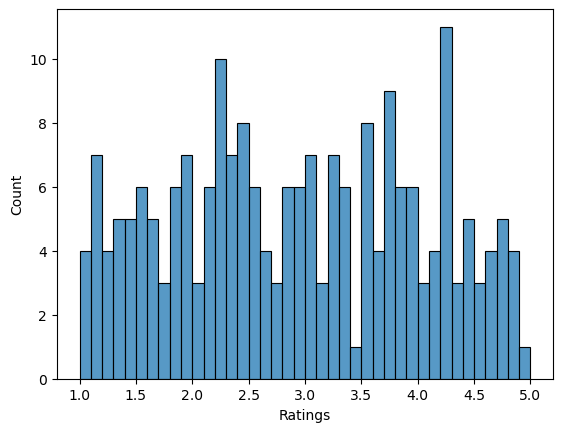

In [108]:
sns.histplot(data=books,x='Ratings', binwidth=0.1)
plt.show()

In [109]:
books.columns

Index(['Title', 'Author', 'Genre', 'Height', 'Publisher', 'Ratings'], dtype='object')

In [110]:
books.select_dtypes(include='number').head(3) #It displays only numberic columns

,Height,Ratings
0,228,4.9
1,235,1.2
2,197,1.8


In [111]:
books.select_dtypes(exclude='number').head(3) #It displays only non numberic exclude

,Title,Author,Genre,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,Wiley
1,Data Smart,"Foreman, John",data_science,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,Penguin


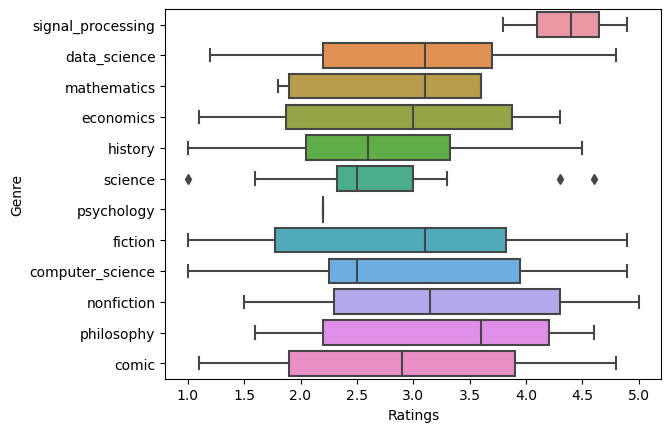

In [112]:
sns.boxplot(data=books,x='Ratings',y='Genre')
plt.show()

In [113]:
books.Ratings.mean()

2.971563981042654

In [114]:
books.groupby('Genre').Ratings.mean()

Genre
comic                2.915385
computer_science     2.900000
data_science         2.958824
economics            2.820000
fiction              2.923437
history              2.719231
mathematics          2.800000
nonfiction           3.310000
philosophy           3.211765
psychology           2.200000
science              2.692857
signal_processing    4.366667
Name: Ratings, dtype: float64

In [115]:
books.groupby('Genre').Ratings.mode() #Generte error beacuse of multiple modes and also it not works with groupby

AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

In [116]:
books.groupby('Genre').Ratings.count()

Genre
comic                13
computer_science     11
data_science         17
economics            10
fiction              64
history              26
mathematics           5
nonfiction           30
philosophy           17
psychology            1
science              14
signal_processing     3
Name: Ratings, dtype: int64

In [117]:
books.groupby('Genre').Ratings.sum()

Genre
comic                 37.9
computer_science      31.9
data_science          50.3
economics             28.2
fiction              187.1
history               70.7
mathematics           14.0
nonfiction            99.3
philosophy            54.6
psychology             2.2
science               37.7
signal_processing     13.1
Name: Ratings, dtype: float64

In [118]:
books.groupby('Genre').Ratings.min()

Genre
comic                1.1
computer_science     1.0
data_science         1.2
economics            1.1
fiction              1.0
history              1.0
mathematics          1.8
nonfiction           1.5
philosophy           1.6
psychology           2.2
science              1.0
signal_processing    3.8
Name: Ratings, dtype: float64

In [119]:
books_n = books.select_dtypes(include='number')
books_s = books.select_dtypes(exclude='number')
books_n.agg(['mean','std'])

,Height,Ratings
mean,206.056872,2.971564
std,26.828141,1.099111


In [120]:
books_n.columns

Index(['Height', 'Ratings'], dtype='object')

In [121]:
books_s

,Title,Author,Genre,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,Wiley
1,Data Smart,"Foreman, John",data_science,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,HarperCollins
4,Orientalism,"Said, Edward",history,Penguin
...,...,...,...,...
206,Structure and Randomness,"Tao, Terence",mathematics,NaN
207,Image Processing with MATLAB,"Eddins, Steve",signal_processing,NaN
208,Animal Farm,"Orwell, George",fiction,NaN
209,"Idiot, The","Dostoevsky, Fyodor",fiction,NaN


In [122]:
for col in books_n:
    books[col]=books[col].fillna(books[col].mean()) #Fill empty cells with mean in numerical column

In [123]:
books.agg({
    'Height':['mean','std'],
    'Ratings':['median']
})

,Height,Ratings
mean,206.056872,NaN
std,26.828141,NaN
median,NaN,3.0


In [124]:
#groupby aggregation 
books.groupby('Genre').agg(
    mean_rating=('Ratings','mean'),
    std_rating=('Ratings','std'),
    median_height=('Height','median')
)

,mean_rating,std_rating,median_height
Genre,,,
comic,2.915385,1.240864,258.0
computer_science,2.900000,1.224745,235.0
data_science,2.958824,1.041669,233.0
economics,2.820000,1.242578,205.0
fiction,2.923437,1.156314,180.0
history,2.719231,0.909074,197.0
mathematics,2.800000,0.891628,234.0
nonfiction,3.310000,1.114590,207.5
philosophy,3.211765,1.064121,203.0


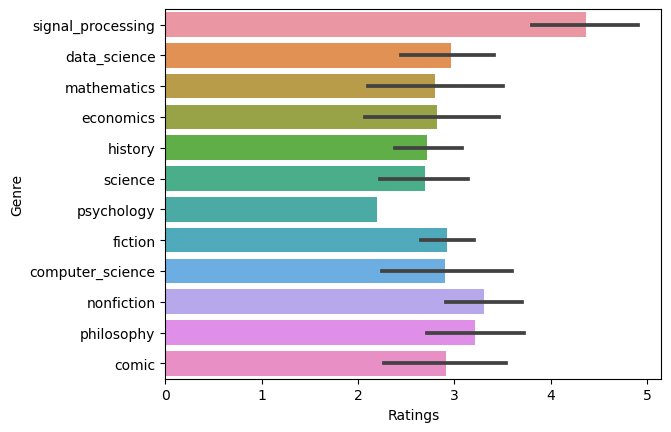

In [125]:
sns.barplot(data=books, x='Ratings', y='Genre')
plt.show()

In [126]:
salaries=pd.read_csv("salary_data.csv")
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020.0,Data Analyst,Lead,PT,Germany,M,0.0,NaN
1,2021.0,Business Analyst,Senior,FT,UK,L,0.0,53320.87
2,2023.0,NaN,Junior,Contract,UK,NaN,100.0,NaN
3,2021.0,Business Analyst,Junior,FT,Germany,S,100.0,55682.63
4,2024.0,Data Scientist,Lead,FT,USA,S,100.0,69469.78


In [127]:
salaries.columns

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')

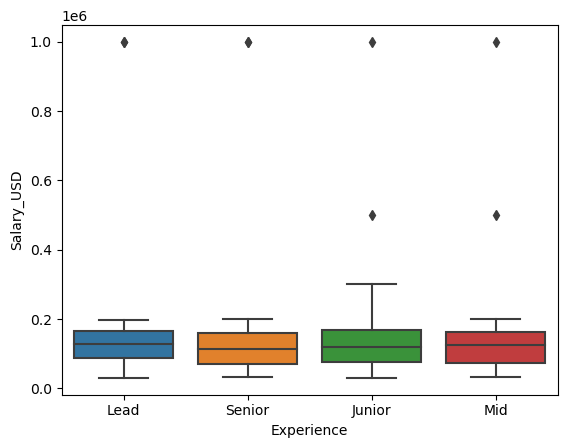

In [128]:
sns.boxplot(data=salaries, x='Experience',y='Salary_USD')
plt.show()

In [129]:
salaries.isna().sum()

Working_Year            12
Designation             42
Experience              48
Employment_Status       31
Employee_Location       42
Company_Size            40
Remote_Working_Ratio    24
Salary_USD              71
dtype: int64

In [130]:
len(salaries)

500

In [82]:
#step1 remove those columns where most of the values are NULL

In [131]:
threshold=45
col_to_remove= salaries.isna().sum()>=threshold
print(col_to_remove)

Working_Year            False
Designation             False
Experience               True
Employment_Status       False
Employee_Location       False
Company_Size            False
Remote_Working_Ratio    False
Salary_USD               True
dtype: bool


In [132]:
#salaries = salaries.drop('Experience', axis=1) #It only excute one time, throw error if execute after deletion
#salaries = salaries.drop('Salary_USD', axis=1) #It only excute one time, throw error if execute after deletion
salaries.columns

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')

In [134]:
#salaries.drop(columns=)   #see from mam file

In [142]:
num_c = salaries.select_dtypes(include="number").columns
print(num_c)

Index(['Working_Year', 'Remote_Working_Ratio', 'Salary_USD'], dtype='object')


In [143]:
cat_c = salaries.select_dtypes(exclude="number").columns
print(cat_c)

Index(['Designation', 'Experience', 'Employment_Status', 'Employee_Location',
       'Company_Size'],
      dtype='object')


In [147]:
for col in cat_c:
    salaries[col]=salaries[col].fillna(salaries[col].mode()[0])

In [151]:
for col in num_c:
    salaries[col]=salaries[col].fillna(salaries[col].mean())
salaries.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

In [153]:
salaries.groupby('Employment_Status')[cat_c].agg(lambda x:x.mode().iloc[0] if not x.mode().empty else None) #Learn from GPT

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
Employment_Status,,,,,
Contract,Business Analyst,Junior,Contract,UK,L
FT,Business Analyst,Junior,FT,Canada,L
PT,Data Scientist,Mid,PT,India,M


In [159]:
salaries_dict=salaries.groupby('Employment_Status')['Working_Year'].mean().to_dict()
print(salary_dict)

{'Contract': 2019.590909090909, 'FT': 2019.7716039212455, 'PT': 2019.4761904761904}


In [162]:
salaries["Employment_Status"]= salaries["Employment_Status"].fillna(salaries["Working_Year"].map(salaries_dict))
print(salaries["Working_Year"])

0      2020.0
1      2021.0
2      2023.0
3      2021.0
4      2024.0
        ...  
495    2019.0
496    2015.0
497    2020.0
498    2019.0
499    2019.0
Name: Working_Year, Length: 500, dtype: float64


In [161]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020.0,Data Analyst,Lead,PT,Germany,M,0.0,133100.43345
1,2021.0,Business Analyst,Senior,FT,UK,L,0.0,53320.87000
2,2023.0,Business Analyst,Junior,Contract,UK,L,100.0,133100.43345
3,2021.0,Business Analyst,Junior,FT,Germany,S,100.0,55682.63000
4,2024.0,Data Scientist,Lead,FT,USA,S,100.0,69469.78000
